In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [12]:
train_df = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
prop_df = pd.read_csv("properties_2016.csv")
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
original_df = train_df.copy()

/home/ian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
test_df = prop_df[~prop_df['parcelid'].isin(train_df['parcelid'].tolist())]

In [ ]:
test_df.shape[0]+train_df.shape[0] - prop_df.shape[0]

In [147]:
train_df['taxdelinquencyflag'].value_counts()      
# train_df[train_df['yardbuildingsqft26'] > 0]['logerror'].mean()
# train_df['logerror'].describe()
# train_df['actypeneither'] = [True if math.isnan(x) else False for x in train_df['airconditioningtypeid']]

Y    1783
Name: taxdelinquencyflag, dtype: int64

In [14]:
train_df['actypenan'] = [True if math.isnan(x) else False for x in train_df['airconditioningtypeid']]
train_df['actype1'] = [True if x == 1 else False for x in train_df['airconditioningtypeid']]
train_df = pd.concat([train_df, pd.get_dummies(train_df['fips'], drop_first=True, prefix='fips')], axis=1)
del train_df['fips']
train_df['fireplacecnt'].fillna(0, inplace=True)
train_df['fullbathcnt'].fillna(0, inplace=True)
for i, size in enumerate(train_df['garagetotalsqft']):
    if size == 0:
        if train_df['garagecarcnt'][i] != 0:
            train_df['garagetotalsqft'][i] = np.nan
train_df['hashottuborspa'].fillna(False, inplace=True)
train_df['poolcnt'] = train_df['poolcnt'].map(lambda x: False if math.isnan(x) else True)
train_df['pooltypeid10'] = train_df['pooltypeid10'].map(lambda x: False if math.isnan(x) else True)
train_df['pooltypeid2'] = train_df['pooltypeid2'].map(lambda x: False if math.isnan(x) else True)
train_df['pooltypeid7'] = train_df['pooltypeid7'].map(lambda x: False if math.isnan(x) else True)
train_df = pd.concat([train_df, pd.get_dummies(train_df['regionidcounty'], drop_first=True, prefix='regionid')], axis=1)
del train_df['regionidcounty']
train_df['storytypeid'] = train_df['storytypeid'].map(lambda x: True if math.isnan(x) else False)
train_df['decktypeid'] = [True if x == 1 else False for x in train_df['decktypeid']]
train_df['unitcnt'].fillna(0, inplace=True)
train_df['numberofstories'].fillna(0, inplace=True)
train_df['fireplaceflag'] = train_df['fireplaceflag'].map(lambda x: False if math.isnan(x) else True)
train_df['taxvaluedollarcnt'].fillna(train_df['taxvaluedollarcnt'].mean(), inplace=True)
train_df['landtaxvaluedollarcnt'].fillna(train_df['landtaxvaluedollarcnt'].mean(), inplace=True)
train_df['taxamount'].fillna(train_df['taxamount'].mean(), inplace=True)
train_df['taxdelinquencyflag'] = train_df['taxdelinquencyflag'].map(lambda x: True if x == 'Y' else False)

In [15]:
def fix_test(df):
    df['actypenan'] = [True if math.isnan(x) else False for x in df['airconditioningtypeid']]
    df['actype1'] = [True if x == 1 else False for x in df['airconditioningtypeid']]
    df = pd.concat([df, pd.get_dummies(df['fips'], drop_first=True, prefix='fips')], axis=1)
    df['fireplacecnt'].fillna(0, inplace=True)
    df['fullbathcnt'].fillna(0, inplace=True)
    for i, size in zip(df.index, df['garagetotalsqft']):
        if size == 0:
            if df['garagecarcnt'][i] != 0:
                df['garagetotalsqft'][i] = np.nan
    df['hashottuborspa'].fillna(False, inplace=True)
    df['poolcnt'] = df['poolcnt'].map(lambda x: False if math.isnan(x) else True)
    df['pooltypeid10'] = df['pooltypeid10'].map(lambda x: False if math.isnan(x) else True)
    df['pooltypeid2'] = df['pooltypeid2'].map(lambda x: False if math.isnan(x) else True)
    df['pooltypeid7'] = df['pooltypeid7'].map(lambda x: False if math.isnan(x) else True)
    df = pd.concat([df, pd.get_dummies(df['regionidcounty'], drop_first=True, prefix='regionid')], axis=1)
    df['storytypeid'] = df['storytypeid'].map(lambda x: True if math.isnan(x) else False)
    df['decktypeid'] = [True if x == 1 else False for x in df['decktypeid']]
    df['unitcnt'].fillna(0, inplace=True)
    df['numberofstories'].fillna(0, inplace=True)
    df['fireplaceflag'] = df['fireplaceflag'].map(lambda x: False if math.isnan(x) else True)
    df['taxvaluedollarcnt'].fillna(df['taxvaluedollarcnt'].mean(), inplace=True)
    df['landtaxvaluedollarcnt'].fillna(df['landtaxvaluedollarcnt'].mean(), inplace=True)
    df['taxamount'].fillna(df['taxamount'].mean(), inplace=True)
    df['taxdelinquencyflag'] = df['taxdelinquencyflag'].map(lambda x: True if x == 'Y' else False)
    
    del df['airconditioningtypeid']
    del df['architecturalstyletypeid']
    del df['basementsqft']
    del df['buildingclasstypeid']
    del df['finishedfloor1squarefeet']
    del df['finishedsquarefeet13']
    del df['finishedsquarefeet15']
    del df['finishedsquarefeet50']
    del df['finishedsquarefeet6']
    del df['fips']
    del df['heatingorsystemtypeid']
    del df['poolsizesum']
    del df['propertycountylandusecode']
    del df['propertyzoningdesc']
    del df['regionidcity']
    del df['regionidcounty']
    del df['regionidneighborhood']
    del df['regionidzip']
    del df['decktypeid']
    del df['threequarterbathnbr']
    del df['typeconstructiontypeid']
    del df['yardbuildingsqft17']
    del df['yardbuildingsqft26']
    del df['assessmentyear']
    del df['taxdelinquencyyear']

In [16]:
del train_df['airconditioningtypeid']
del train_df['architecturalstyletypeid']
del train_df['basementsqft']
del train_df['buildingclasstypeid']
del train_df['finishedfloor1squarefeet']
del train_df['finishedsquarefeet13']
del train_df['finishedsquarefeet15']
del train_df['finishedsquarefeet50']
del train_df['finishedsquarefeet6']
del train_df['heatingorsystemtypeid']
del train_df['poolsizesum']
del train_df['propertycountylandusecode']
del train_df['propertyzoningdesc']
del train_df['regionidcity']
del train_df['regionidneighborhood']
del train_df['regionidzip']
del train_df['decktypeid']
del train_df['threequarterbathnbr']
del train_df['typeconstructiontypeid']
del train_df['yardbuildingsqft17']
del train_df['yardbuildingsqft26']
del train_df['assessmentyear']
del train_df['taxdelinquencyyear']

In [7]:
train_y = train_df['logerror'].values

del train_df['parcelid']
del train_df['logerror']
del train_df['transactiondate']

In [17]:
df_201610 = train_df[(train_df['transactiondate'].dt.year == 2016) & (train_df['transactiondate'].dt.month == 10)]
df_201611 = train_df[(train_df['transactiondate'].dt.year == 2016) & (train_df['transactiondate'].dt.month == 11)]
df_201612 = train_df[(train_df['transactiondate'].dt.year == 2016) & (train_df['transactiondate'].dt.month == 12)]
df_201710 = train_df[(train_df['transactiondate'].dt.year == 2017) & (train_df['transactiondate'].dt.month == 10)]
df_201711 = train_df[(train_df['transactiondate'].dt.year == 2017) & (train_df['transactiondate'].dt.month == 11)]
df_201712 = train_df[(train_df['transactiondate'].dt.year == 2017) & (train_df['transactiondate'].dt.month == 12)]

In [9]:
prediction_df = train_df.dropna(axis=1,how='any')

In [11]:
from sklearn.ensemble import RandomForestRegressor
X = prediction_df
predict_cols = ['buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 
               'garagecarcnt', 'garagetotalsqft', 'lotsizesquarefeet', 'yearbuilt', 'structuretaxvaluedollarcnt', 
               'censustractandblock']
for col in predict_cols:
    print(col)
    new_col = train_df[col].values
    missing = np.isnan(new_col)

    mod = RandomForestRegressor()
    mod.fit(X[~missing], new_col[~missing])

    mother_hs_pred = mod.predict(X[missing])
    mother_hs_pred

    new_col[missing] = mother_hs_pred
    train_df[col] = new_col

buildingqualitytypeid
calculatedbathnbr
calculatedfinishedsquarefeet
finishedsquarefeet12
garagecarcnt
garagetotalsqft
lotsizesquarefeet
yearbuilt
structuretaxvaluedollarcnt
censustractandblock


In [154]:
train_df['buildingqualitytypeid'] = train_df['buildingqualitytypeid'].fillna(train_df['buildingqualitytypeid'].mean())
train_df['calculatedbathnbr'] = train_df['calculatedbathnbr'].fillna(train_df['calculatedbathnbr'].mean())
train_df['calculatedfinishedsquarefeet'] = train_df['calculatedfinishedsquarefeet'].fillna(train_df['calculatedfinishedsquarefeet'].mean())
train_df['finishedsquarefeet12'] = train_df['finishedsquarefeet12'].fillna(train_df['finishedsquarefeet12'].mean())
train_df['garagecarcnt'] = train_df['garagecarcnt'].fillna(train_df['garagecarcnt'].mean())
train_df['garagetotalsqft'] = train_df['garagetotalsqft'].fillna(train_df['garagecarcnt'].mean())
train_df['lotsizesquarefeet'] = train_df['lotsizesquarefeet'].fillna(train_df['lotsizesquarefeet'].mean())
train_df['yearbuilt'] = train_df['yearbuilt'].fillna(train_df['lotsizesquarefeet'].mean())
train_df['structuretaxvaluedollarcnt'] = train_df['structuretaxvaluedollarcnt'].fillna(train_df['structuretaxvaluedollarcnt'].mean())
train_df['censustractandblock'] = train_df['censustractandblock'].fillna(train_df['censustractandblock'].mean())

In [241]:
from sklearn.model_selection import cross_val_score

clf = RandomForestRegressor(n_estimators=25)
# clf = clf.fit(train_df, train_y)

scores = cross_val_score(clf, train_df_small, train_y, scoring='neg_mean_absolute_error')
scores.mean()

-0.078557069494976303

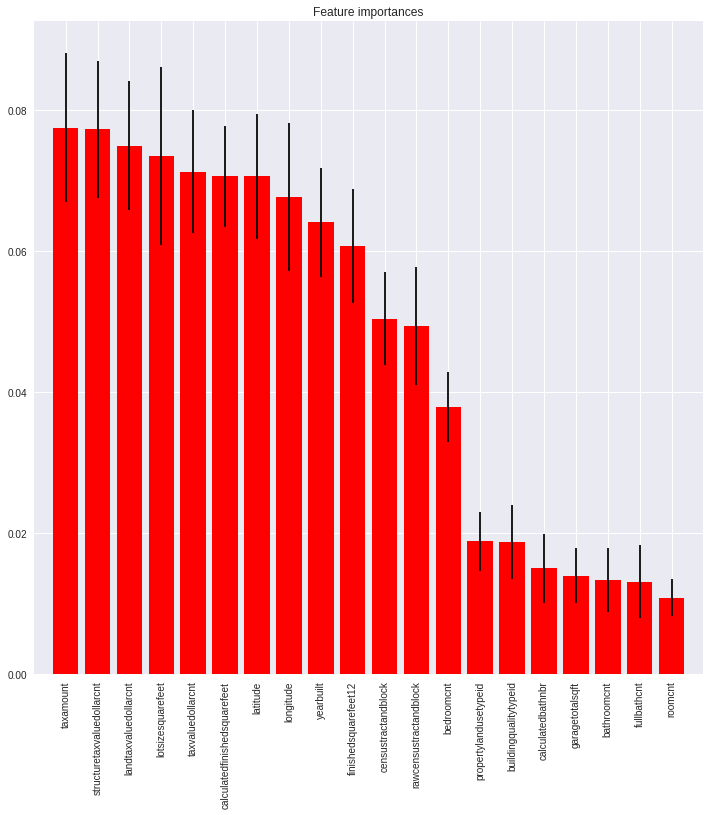

In [168]:
feat_names = train_df.columns.values

from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_df, train_y)

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [242]:
import xgboost as xgb
xgb_params = {
    'learning_rate': 0.1,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0,
    'n_estimators': 1000
}
model = xgb.XGBRegressor(**xgb_params)
scores = cross_val_score(model, train_df_small, train_y, scoring='neg_mean_absolute_error')
scores.mean()

-0.079036634097546812

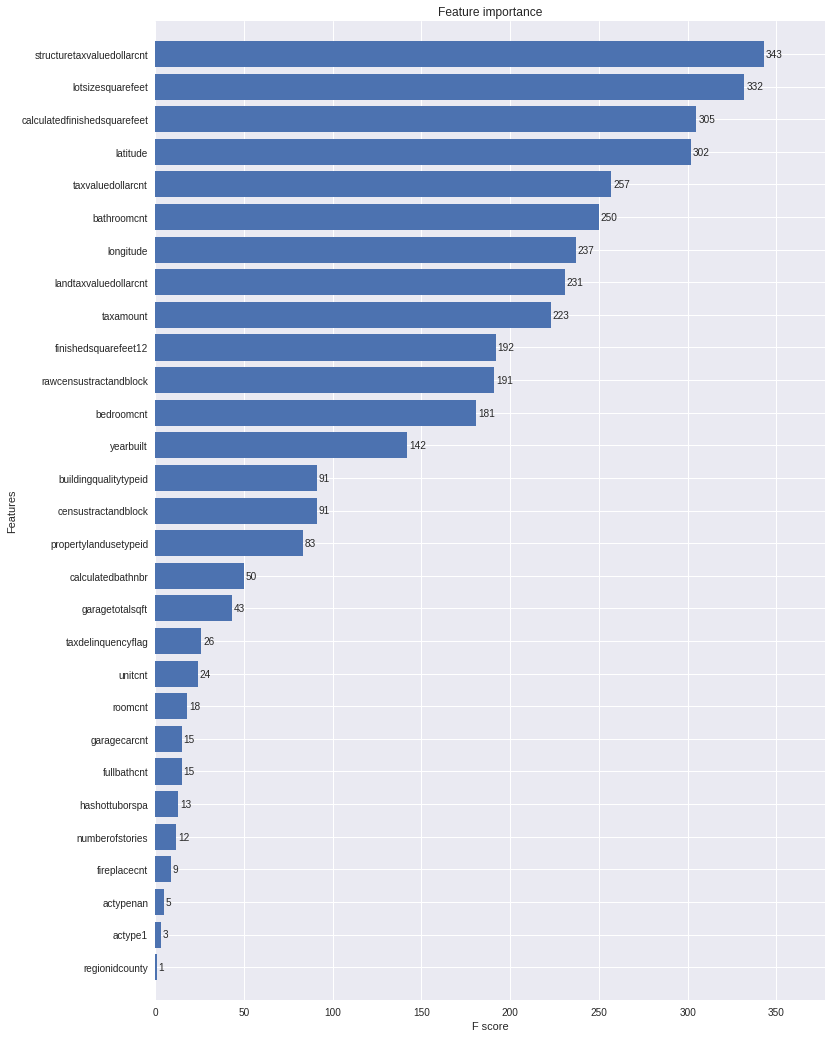

In [167]:
dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

In [17]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df)

estimator = linear_model.LinearRegression(n_jobs=-1)

selector = RFE(estimator)
selector = selector.fit(X_scaled, train_y)
print(selector.support_)
print(selector.ranking_)

[ True False False False  True  True False  True False  True False False
 False False  True False False False False  True  True False False  True
 False False False  True  True  True  True  True  True False False  True
  True  True  True]
[ 1 17 18  7  1  1 11  1 16  1  2 21  5 12  1 15 14  8  6  1  1 10 13  1  9
 20 19  1  1  1  1  1  1  4  3  1  1  1  1]


In [18]:
RFE_df = train_df.loc[:,selector.support_]

In [20]:
from sklearn import linear_model, datasets
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

linreg = linear_model.LinearRegression(n_jobs=-1)
lasso = Lasso(alpha=.3)
ridge = Ridge(alpha=10)
# svr = SVR(kernel="linear")

# we create an instance of Neighbours Classifier and fit the data.
# logreg.fit(train_df, train_y)

from sklearn import preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(RFE_df)

lr_scores = cross_val_score(linreg, X_scaled, train_y, scoring='neg_mean_absolute_error')
lasso_scores = cross_val_score(lasso, X_scaled, train_y, scoring='neg_mean_absolute_error')
ridge_scores = cross_val_score(ridge, X_scaled, train_y, scoring='neg_mean_absolute_error')
# svr_scores = cross_val_score(svr, X_scaled, train_y, scoring='neg_mean_absolute_error')

print('LinearReg: ', lr_scores.mean())
print('Lasso: ', lasso_scores.mean())
print('Ridge: ', ridge_scores.mean())
# print('SVR: ', svr_scores.mean())

LinearReg:  -0.068395396768
Lasso:  -0.0685275936305
Ridge:  -0.0683986800442


In [183]:
train_df_small = train_df[['taxamount', 'lotsizesquarefeet', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'yearbuilt', 'rawcensustractandblock', 'bathroomcnt', 'bedroomcnt']]

In [185]:
linreg = linear_model.LinearRegression(n_jobs=-1)

scores = cross_val_score(linreg, train_df_small, train_y, scoring='neg_mean_absolute_error')
scores.mean()

-0.068473403717404055

In [53]:
train_df['logerror'] = train_y
col = 'taxamount'
brackets = [1000, 18000, 46000, 119000]
bracket1_df = train_df[train_df[col] <= brackets[0]]
bracket1_y = bracket1_df.pop('logerror')
bracket2_df = train_df[(train_df[col] > brackets[0]) & (train_df[col] <= brackets[1])]
bracket2_y = bracket2_df.pop('logerror')
bracket3_df = train_df[(train_df[col] > brackets[1]) & (train_df[col] <= brackets[2])]
bracket3_y = bracket3_df.pop('logerror')
bracket4_df = train_df[(train_df[col] > brackets[2]) & (train_df[col] <= brackets[3])]
bracket4_y = bracket4_df.pop('logerror')
bracket5_df = train_df[(train_df[col] > brackets[3])]
bracket5_y = bracket5_df.pop('logerror')
del train_df['logerror']

In [56]:
linreg = linear_model.LinearRegression(n_jobs=-1)
import xgboost as xgb
xgb_params = {
    'learning_rate': 0.1,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0,
    'n_estimators': 1000
}
model = xgb.XGBRegressor(**xgb_params)
clf = RandomForestRegressor(n_estimators=25)

scores1 = cross_val_score(clf, bracket1_df, bracket1_y, scoring='neg_mean_absolute_error')
scores2 = cross_val_score(linreg, bracket2_df, bracket2_y, scoring='neg_mean_absolute_error')
scores3 = cross_val_score(clf, bracket3_df, bracket3_y, scoring='neg_mean_absolute_error')
scores4 = cross_val_score(model, bracket4_df, bracket4_y, scoring='neg_mean_absolute_error')
scores5 = cross_val_score(model, bracket5_df, bracket5_y, scoring='neg_mean_absolute_error')
print('Bracket 1: ', scores1.mean())
print('Bracket 2: ', scores2.mean())
print('Bracket 3: ', scores3.mean())
print('Bracket 4: ', scores4.mean())
print('Bracket 5: ', scores5.mean())

Bracket 1:  -0.11912871672
Bracket 2:  -0.0658759498052
Bracket 3:  -0.130018335925
Bracket 4:  -0.178513107693
Bracket 5:  -0.200890068019


In [60]:
(scores1.mean()*bracket1_df.shape[0] + scores2.mean()*bracket2_df.shape[0] + scores3.mean()*bracket3_df.shape[0] + scores4.mean()*bracket4_df.shape[0] + scores5.mean()*bracket5_df.shape[0])/train_df.shape[0]

-0.070076476872465931